In [1]:
import numpy as np
import torch
import matplotlib.pyplot as plt
import torch.nn as nn
import os

In [2]:
torch.manual_seed(1)
device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")

In [3]:
def train_model(model, x, y, loss_threshold=0.0001, gradient_threshold=1e-4, max_epoch=5000, print_interval=100):

    epoch_arr, loss_arr, grad_arr = [], [], []
    epoch = 0
    not_converged = True
    
    while not_converged:
        epoch += 1

        prediction = model(x)
        loss = loss_func(prediction, y)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        epoch_arr.append(epoch)
        loss_arr.append(loss.item())  

        grad_norm = torch.sqrt(sum((p.grad ** 2).sum() for p in model.parameters() if p.grad is not None)).item()
        grad_arr.append(grad_norm)

        if epoch % print_interval == 0:
            print(f'Epoch: {epoch}, Loss: {loss.item():.4f}, Grad Norm: {grad_norm:.6f}')

        if epoch >= max_epoch:
            print("Max Epoch Reached")
            not_converged = False

        elif len(loss_arr) > 5 and loss_arr[-1] < loss_threshold:
            loss_delta1 = abs(loss_arr[-3] - loss_arr[-2])
            loss_delta2 = abs(loss_arr[-2] - loss_arr[-1])
            if loss_delta1 < gradient_threshold and loss_delta2 < gradient_threshold:
                print(f"Convergence reached for loss: {loss_arr[-1]:.6f}")
                not_converged = False

    return epoch_arr, loss_arr, prediction, grad_arr


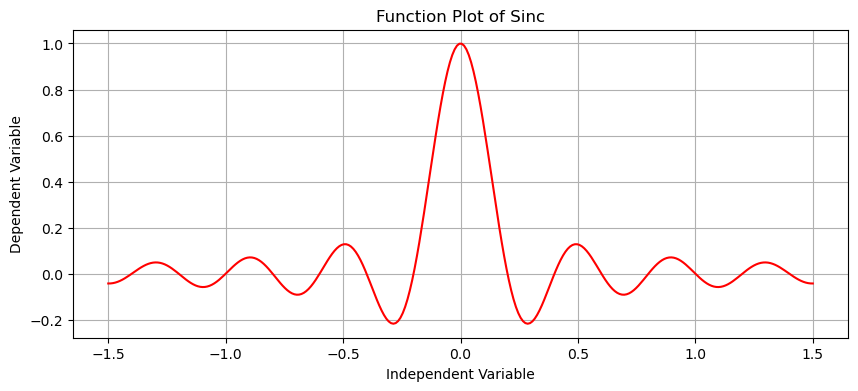

In [4]:
x = torch.linspace(-1.5, 1.5, steps=300).unsqueeze(1) 
y = torch.sinc(5 * x)  

# Plot the function
plt.figure(figsize=(10, 4))
plt.plot(x.numpy(), y.numpy(), color="red")
plt.title('Function Plot of Sinc')
plt.xlabel('Independent Variable')
plt.ylabel('Dependent Variable')
plt.grid(True)  
plt.show()

In [5]:
class Model(nn.Module):
    def __init__(self,):
        super(Model, self).__init__()
        self.linear1 = nn.Linear(1, 5)
        self.linear2 = nn.Linear(5, 10)
        self.linear3 = nn.Linear(10, 10)
        self.linear4 = nn.Linear(10, 10)
        self.linear5 = nn.Linear(10, 10)
        self.linear6 = nn.Linear(10, 10)
        self.linear7 = nn.Linear(10, 10)
        self.linear8 = nn.Linear(10, 10)
        self.linear9 = nn.Linear(10, 5)
        self.predict = nn.Linear(5, 1)
    
    def forward(self,x):
        x = nn.functional.leaky_relu(self.linear1(x))
        x = nn.functional.leaky_relu(self.linear2(x))
        x = nn.functional.leaky_relu(self.linear3(x))
        x = nn.functional.leaky_relu(self.linear4(x))
        x = nn.functional.leaky_relu(self.linear5(x))
        x = nn.functional.leaky_relu(self.linear6(x))
        x = nn.functional.leaky_relu(self.linear7(x))
        x = nn.functional.leaky_relu(self.linear8(x))
        x = nn.functional.leaky_relu(self.linear9(x))

        x = self.predict(x)
        return x
 
model = Model()

In [6]:
optimizer = torch.optim.Adam(model.parameters(), lr=1e-4, weight_decay=1e-4) 
loss_func = torch.nn.MSELoss()

pytorch_total_params = sum(p.numel() for p in model.parameters())
print(f'Total parameters in the model: {pytorch_total_params}')

m1_epoch_arr, m1_loss_arr, m1_prediction, m1_grad_arr = train_model(model, x, y)

Total parameters in the model: 791
Epoch: 100, Loss: 0.3120, Grad Norm: 1.072838
Epoch: 200, Loss: 0.2904, Grad Norm: 1.021921
Epoch: 300, Loss: 0.2767, Grad Norm: 0.928686
Epoch: 400, Loss: 0.2513, Grad Norm: 0.948720
Epoch: 500, Loss: 0.2302, Grad Norm: 0.904287
Epoch: 600, Loss: 0.2111, Grad Norm: 0.861097
Epoch: 700, Loss: 0.1935, Grad Norm: 0.816948
Epoch: 800, Loss: 0.1768, Grad Norm: 0.772829
Epoch: 900, Loss: 0.1605, Grad Norm: 0.726809
Epoch: 1000, Loss: 0.1439, Grad Norm: 0.675233
Epoch: 1100, Loss: 0.1269, Grad Norm: 0.615407
Epoch: 1200, Loss: 0.1087, Grad Norm: 0.540057
Epoch: 1300, Loss: 0.0867, Grad Norm: 0.420673
Epoch: 1400, Loss: 0.0673, Grad Norm: 0.226603
Epoch: 1500, Loss: 0.0616, Grad Norm: 0.037304
Epoch: 1600, Loss: 0.0613, Grad Norm: 0.007099
Epoch: 1700, Loss: 0.0610, Grad Norm: 0.053999
Epoch: 1800, Loss: 0.0606, Grad Norm: 0.016094
Epoch: 1900, Loss: 0.0602, Grad Norm: 0.005062
Epoch: 2000, Loss: 0.0597, Grad Norm: 0.006086
Epoch: 2100, Loss: 0.0591, Grad No

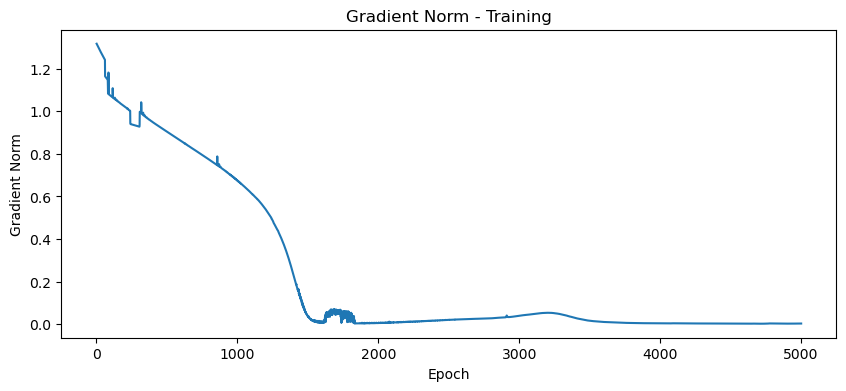

In [7]:
plt.figure(figsize=(10,4))
plt.plot(m1_epoch_arr, m1_grad_arr)
plt.title('Gradient Norm - Training')
plt.xlabel("Epoch")
plt.ylabel("Gradient Norm")
plt.show()

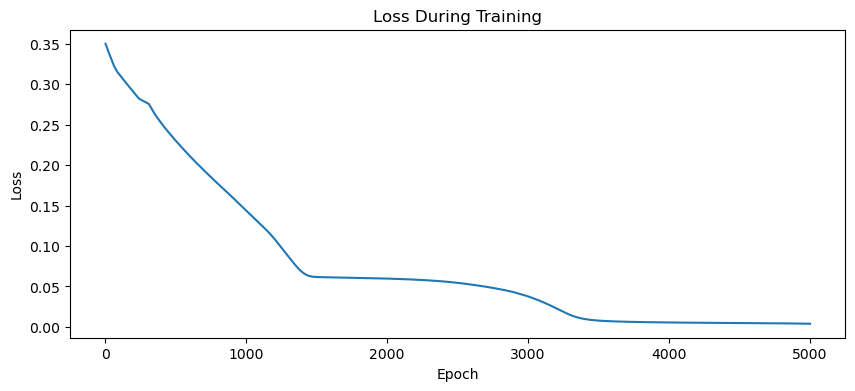

In [8]:
plt.figure(figsize=(10,4))
plt.plot(m1_epoch_arr, m1_loss_arr)
plt.title('Loss During Training')
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.show()

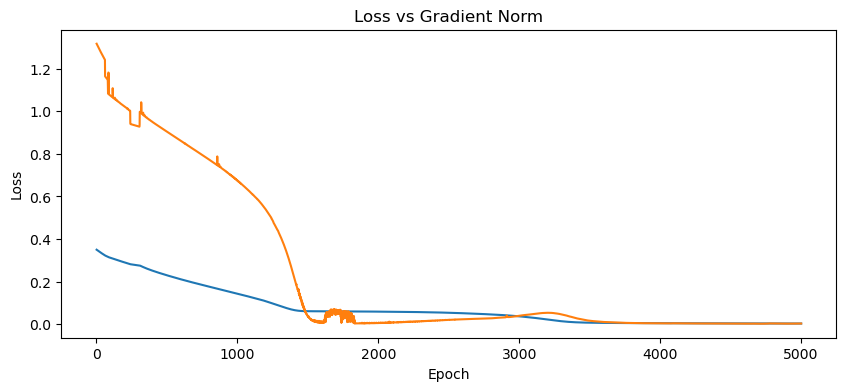

In [9]:
plt.figure(figsize=(10,4))
plt.plot(m1_epoch_arr, m1_loss_arr)
plt.plot(m1_epoch_arr, m1_grad_arr)
plt.title('Loss vs Gradient Norm')
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.show()